In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=cdf1a1f2ffee10d55eed0c457cb409db55aa91cd8f90bc302d136e02c307498d
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark import SparkContext,SparkConf
conf = SparkConf().setAppName("lab 13").setMaster("local[*]")
sc = SparkContext(conf=conf)

In [30]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MoviesDataAnalysis").getOrCreate()

# Read the CSV file into a DataFrame
movies_df = spark.read.format("csv").option("header", "true").load("Movies.csv")

Question No 1

In [36]:
from pyspark.sql.functions import col
action_award_movies = movies_df.select("title", "year", "director") \
    .where((col("Genre") == "Action") & (col("Awards") == "Yes"))

action_award_movies.show()


+-----+----+--------+
|title|year|director|
+-----+----+--------+
+-----+----+--------+



Question No 2

In [39]:
from pyspark.sql.functions import col, collect_list

actor_movies = movies_df.select("Actor", "Title", "Director") \
    .where(col("Awards") == True) \
    .groupBy("Actor") \
    .agg(collect_list("Title").alias("Movies"), collect_list("Director").alias("directors"))

actor_movies.show()


+-----------------+--------------------+--------------------+
|            Actor|              Movies|           directors|
+-----------------+--------------------+--------------------+
|     LintDerek De|        [AssaultThe]|    [RademakersFons]|
|    LancasterBurt|[Airport, Come Ba...|[SeatonGeorge, Ma...|
|      BridgesBeau|         [Norma Rae]|        [RittMartin]|
|  CapolicchioLino|[Garden of the Fi...|   [De SicaVittorio]|
|         LoneJohn|   [Last EmperorThe]|[BertolucciBernardo]|
|      IronsJeremy|[Reversal of Fort...|   [SchroederBarbet]|
|AumontJean-Pierre|     [Day for Night]|  [TruffautFrançois]|
|         HarrisEd|[Places in the He...|      [BentonRobert]|
|      ConnerySean|   [UntouchablesThe]|     [De PalmaBrian]|
|      HarrisonRex|      [My Fair Lady]|       [CukorGeorge]|
|       HudsonRock|             [Giant]|     [StevensGeorge]|
|     TracySpencer|[Judgment at Nure...|[KramerStanley, K...|
|  StrouseNocholas|[Doin' Time on Pl...|    [MatthauCharles]|
|    Bey

Question No 4

In [40]:

least_popular_movies = movies_df.select("Title", "Year", "Popularity") \
    .where(col("Year") < 1980) \
    .orderBy("Popularity") \
    .limit(10)

least_popular_movies.show()


+------------------+----+----------+
|             Title|Year|Popularity|
+------------------+----+----------+
|   White Lightning|1953|      null|
|      Desert Rider|1923|      null|
|      Drop KickThe|1927|      null|
| Bank on the Stars|1954|      null|
|Shout at the Devil|1976|         0|
|           Shalako|1968|         0|
|     Anna Christie|1930|         0|
|           Airport|1970|         0|
| Tales of Tomorrow|1953|         0|
|          Stavisky|1974|         1|
+------------------+----+----------+



Question No 3

In [41]:
most_popular_movies = movies_df.select("Title", "Year", "Popularity") \
    .where(col("Awards") == 0) \
    .orderBy(col("Popularity").desc()) \
    .limit(10)

most_popular_movies.show()

+-----+----+----------+
|Title|Year|Popularity|
+-----+----+----------+
+-----+----+----------+



Question No 5


In [43]:

df_sorted = movies_df.filter(movies_df.Year < 1990).orderBy("Title")

df_sorted.show()


+----+------+--------------------+---------------+--------------------+-----------------+-------------------+----------+------+-------------------+
|Year|Length|               Title|          Genre|               Actor|          Actress|           Director|Popularity|Awards|              Image|
+----+------+--------------------+---------------+--------------------+-----------------+-------------------+----------+------+-------------------+
|1968|   139|2001: A Space Ody...|Science Fiction|          DulleaKeir|   TyzackMargaret|     KubrickStanley|        83|    No|   NicholasCage.png|
|1982|    92|             48 Hrs.|         Action|           NolteNick|   O'TooleAnnette|         HillWalter|        67|    No|   NicholasCage.png|
|1963|   138|               8 1/2|          Drama| MastroianniMarcello| CardinaleClaudia|    FelliniFederico|        80|   Yes|   NicholasCage.png|
|1966|    95|A Big Hand for th...|         Comedy|          FondaHenry|   WoodwardJoanne|        CookFielder|   

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("WineDataAnalysis").getOrCreate()

wine_df = spark.read.format("csv").option("header", "true").load("wine.csv")


In [6]:
wine_df.describe().show()


+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|summary|           Alcohol|        Malic_Acid|               Ash|     Ash_Alcanity|         Magnesium|     Total_Phenols|        Flavanoids|Nonflavanoid_Phenols|   Proanthocyanins|  Color_Intensity|                Hue|             OD280|          Proline|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|  count|               178|               178|               178|              178|               178|               178|               178|                 178|               178|              178|                178|          

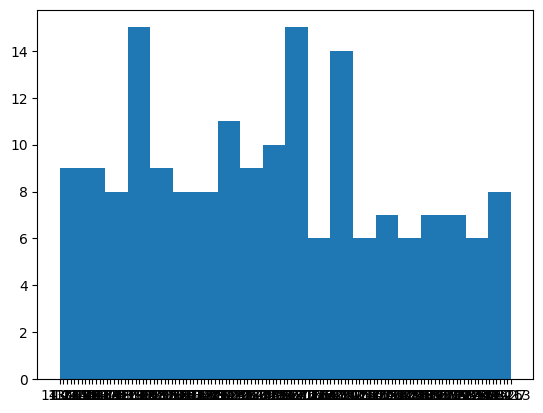

In [7]:
import matplotlib.pyplot as plt

alcohol = wine_df.select("alcohol").rdd.flatMap(lambda x: x).collect()

plt.hist(alcohol, bins=20)
plt.show()


In [19]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
df = wine_df.select(col("Alcohol").cast("float"), col("Ash").cast("float"))

assembler = VectorAssembler(inputCols=["Alcohol", "Ash"], outputCol="features")
df = assembler.transform(df)

r = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r[0]))


Pearson correlation matrix:
DenseMatrix([[1.        , 0.21154461],
             [0.21154461, 1.        ]])


Question N.o 7


In [27]:
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

df = spark.read.csv("wine.csv", header=True, inferSchema=True)

cols = ["Alcohol", "Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Flavanoids",
        "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]

for c in cols:
    df = df.withColumn(c, col(c).cast("double"))

assembler = VectorAssembler(inputCols=df.columns, outputCol="features")
df = assembler.transform(df).select("features")

kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(df)
predictions = model.transform(df)
wssse = model.summary.trainingCost
print("Within Set Sum of Squared Errors (WSSSE): ", wssse)
bisecting_kmeans = BisectingKMeans(k=3, seed=1)
model = bisecting_kmeans.fit(df)
predictions = model.transform(df)
wssse = model.summary.trainingCost
print("KMeans model WSSSE = {:.2f}".format(wssse))

Within Set Sum of Squared Errors (WSSSE):  2629315.194018101
KMeans model WSSSE = 2772942.71
